# CNN Experiments

We train CNNs on two feature maps (raw data and Fourier-transformed data), using 10-fold cross-validation to select hyperparameters.

## Contents
1. [Set-Up](#Set-Up)
2. [Data](#Data)
3. [Raw Data](#Raw-Data)
4. [Fourier Transform](#Fourier-Transform)

## Set-Up
- Download the [Epileptic Seizure Recognition Data Set](http://archive.ics.uci.edu/ml/datasets/Epileptic+Seizure+Recognition) and place it in the current directory.

In [ ]:
import numpy as np
import pandas as pd
import util

## Data
We first parse and normalize our dataset.

In [2]:
X, y, ids, chunks = util.parse_data()
X = X.reshape(X.shape[0], X.shape[1], 1)
classes = np.unique(y)

We split our data 80/20 train/test.

In [3]:
X_train, y_train, ids_train, X_test, y_test, ids_test = util.split_data(X, y, ids, seed=0)

We set up scoring.

In [4]:
scoring = util.get_scoring_metrics(classes)

## Raw Data

In [5]:
r_cv_results, r_acc, r_f1_macro, r_f1_per_class, r_cm = util.evaluate_cnn(
    X_train, y_train, ids_train, X_test, y_test, classes, scoring)






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/25
8280/8280 [==============================] - 9s 1ms/step - loss: 0.9171 - acc: 0.5761
Epoch 2/25
8280/8280 [==============================] - 10s 1ms/step - loss: 0.7239 - acc: 0.6566
Epoch 3/25
8280/8280 [==============================] - ETA: 0s - loss: 0.6536 - acc: 0.684 - 10s 1ms/step - loss: 0.6543 - acc: 0.6836
Epoch 4/25
8280/8280 [==============================] - 11s 1ms/step - loss: 0.6217 - acc: 0.7004
Epoch 5/25
8280/8280 [==============================] - 10s 1ms/step - loss: 0.6025 - acc: 0.7093
Epoch 6/25
8280/8280 [==============================] - 9s 1ms/step - loss: 0.5907 - acc: 0.7150
Epoch 7/25
8280/8280 [==============================] - 10s 1ms/step - loss: 0.5784 - acc: 0.7182
Epoch 8/25
8280/8280 [==============================] - 12s 1m

8280/8280 [==============================] - 9s 1ms/step - loss: 0.5018 - acc: 0.7591A
Epoch 13/25
8280/8280 [==============================] - 9s 1ms/step - loss: 0.4843 - acc: 0.7679
Epoch 14/25
8280/8280 [==============================] - 9s 1ms/step - loss: 0.4658 - acc: 0.7780
Epoch 15/25
8280/8280 [==============================] - 9s 1ms/step - loss: 0.4589 - acc: 0.7784
Epoch 16/25
8280/8280 [==============================] - 9s 1ms/step - loss: 0.4367 - acc: 0.7943
Epoch 17/25
8280/8280 [==============================] - 9s 1ms/step - loss: 0.4271 - acc: 0.7960
Epoch 18/25
8280/8280 [==============================] - 9s 1ms/step - loss: 0.4177 - acc: 0.8027A: 2s - loss: 0 - ETA: 1s - loss: 0.4107 - ac - ETA: 1s 
Epoch 19/25
8280/8280 [==============================] - 9s 1ms/step - loss: 0.4088 - acc: 0.8074
Epoch 20/25
8280/8280 [==============================] - 9s 1ms/step - loss: 0.3988 - acc: 0.8115
Epoch 21/25
8280/8280 [==============================] - 9s 1ms/step - lo

8280/8280 [==============================] - 9s 1ms/step - loss: 0.4643 - acc: 0.7831 - ETA: 1s - 
Epoch 19/25
8280/8280 [==============================] - 9s 1ms/step - loss: 0.4622 - acc: 0.7870
Epoch 20/25
8280/8280 [==============================] - 9s 1ms/step - loss: 0.4406 - acc: 0.7961
Epoch 21/25
8280/8280 [==============================] - 9s 1ms/step - loss: 0.4354 - acc: 0.7986
Epoch 22/25
8280/8280 [==============================] - 9s 1ms/step - loss: 0.4208 - acc: 0.8039
Epoch 23/25
8280/8280 [==============================] - 9s 1ms/step - loss: 0.4059 - acc: 0.8114
Epoch 24/25
8280/8280 [==============================] - 9s 1ms/step - loss: 0.4047 - acc: 0.8134A: 1s - 
Epoch 25/25
8280/8280 [==============================] - 9s 1ms/step - loss: 0.3881 - acc: 0.8175
Epoch 1/25
8280/8280 [==============================] - 10s 1ms/step - loss: 0.9281 - acc: 0.5710
Epoch 2/25
8280/8280 [==============================] - 9s 1ms/step - loss: 0.7295 - acc: 0.6562
Epoch 3/25
8

8280/8280 [==============================] - 10s 1ms/step - loss: 0.4114 - acc: 0.8035
Epoch 23/25
8280/8280 [==============================] - 10s 1ms/step - loss: 0.4050 - acc: 0.8088
Epoch 24/25
8280/8280 [==============================] - 10s 1ms/step - loss: 0.4000 - acc: 0.8149
Epoch 25/25
8280/8280 [==============================] - 10s 1ms/step - loss: 0.3928 - acc: 0.8196
Epoch 1/25
8280/8280 [==============================] - 11s 1ms/step - loss: 0.9156 - acc: 0.5752
Epoch 2/25
8280/8280 [==============================] - 10s 1ms/step - loss: 0.7216 - acc: 0.6610
Epoch 3/25
8280/8280 [==============================] - 10s 1ms/step - loss: 0.6544 - acc: 0.6899
Epoch 4/25
8280/8280 [==============================] - 10s 1ms/step - loss: 0.6200 - acc: 0.6998
Epoch 5/25
8280/8280 [==============================] - 10s 1ms/step - loss: 0.6036 - acc: 0.7021
Epoch 6/25
8280/8280 [==============================] - 10s 1ms/step - loss: 0.5818 - acc: 0.7192
Epoch 7/25
8280/8280 [======

8280/8280 [==============================] - 13s 2ms/step - loss: 0.5948 - acc: 0.7130
Epoch 5/25
8280/8280 [==============================] - 12s 2ms/step - loss: 0.5761 - acc: 0.7293
Epoch 6/25
8280/8280 [==============================] - 12s 2ms/step - loss: 0.5617 - acc: 0.7314
Epoch 7/25
8280/8280 [==============================] - 13s 2ms/step - loss: 0.5597 - acc: 0.7382
Epoch 8/25
8280/8280 [==============================] - 12s 1ms/step - loss: 0.5391 - acc: 0.7482: 1s -
Epoch 9/25
8280/8280 [==============================] - 13s 2ms/step - loss: 0.5345 - acc: 0.7587
Epoch 10/25
8280/8280 [==============================] - 12s 2ms/step - loss: 0.5156 - acc: 0.7667
Epoch 11/25
8280/8280 [==============================] - 12s 2ms/step - loss: 0.5067 - acc: 0.7641
Epoch 12/25
8280/8280 [==============================] - 12s 2ms/step - loss: 0.4868 - acc: 0.7783
Epoch 13/25
8280/8280 [==============================] - 13s 2ms/step - loss: 0.4801 - acc: 0.7790
Epoch 14/25
8280/8280

8280/8280 [==============================] - 13s 2ms/step - loss: 0.5067 - acc: 0.7655
Epoch 13/25
8280/8280 [==============================] - 13s 2ms/step - loss: 0.4970 - acc: 0.7680
Epoch 14/25
8280/8280 [==============================] - 13s 2ms/step - loss: 0.4783 - acc: 0.7793
Epoch 15/25
8280/8280 [==============================] - 13s 2ms/step - loss: 0.4729 - acc: 0.7833
Epoch 16/25
8280/8280 [==============================] - 13s 2ms/step - loss: 0.4685 - acc: 0.7871
Epoch 17/25
8280/8280 [==============================] - 13s 2ms/step - loss: 0.4461 - acc: 0.7960
Epoch 18/25
8280/8280 [==============================] - 13s 2ms/step - loss: 0.4367 - acc: 0.8013
Epoch 19/25
8280/8280 [==============================] - 13s 2ms/step - loss: 0.4205 - acc: 0.8064
Epoch 20/25
8280/8280 [==============================] - 13s 2ms/step - loss: 0.4128 - acc: 0.8127
Epoch 21/25
8280/8280 [==============================] - 13s 2ms/step - loss: 0.3996 - acc: 0.8200
Epoch 22/25
8280/8280 

8280/8280 [==============================] - 13s 2ms/step - loss: 0.3979 - acc: 0.8194
Epoch 21/25
8280/8280 [==============================] - 13s 2ms/step - loss: 0.3854 - acc: 0.8207
Epoch 22/25
8280/8280 [==============================] - 13s 2ms/step - loss: 0.3824 - acc: 0.8264
Epoch 23/25
8280/8280 [==============================] - 13s 2ms/step - loss: 0.3574 - acc: 0.8377
Epoch 24/25
8280/8280 [==============================] - 13s 2ms/step - loss: 0.3544 - acc: 0.8425
Epoch 25/25
8280/8280 [==============================] - 13s 2ms/step - loss: 0.3343 - acc: 0.8499
Epoch 1/25
8280/8280 [==============================] - 14s 2ms/step - loss: 0.8417 - acc: 0.6059
Epoch 2/25
8280/8280 [==============================] - 13s 2ms/step - loss: 0.6457 - acc: 0.6857
Epoch 3/25
8280/8280 [==============================] - 13s 2ms/step - loss: 0.6313 - acc: 0.6937
Epoch 4/25
8280/8280 [==============================] - 13s 2ms/step - loss: 0.6001 - acc: 0.7088
Epoch 5/25
8280/8280 [====

8280/8280 [==============================] - 16s 2ms/step - loss: 0.6497 - acc: 0.6963
Epoch 3/25
8280/8280 [==============================] - 16s 2ms/step - loss: 0.6109 - acc: 0.7165
Epoch 4/25
8280/8280 [==============================] - 16s 2ms/step - loss: 0.5795 - acc: 0.7283
Epoch 5/25
8280/8280 [==============================] - 16s 2ms/step - loss: 0.5695 - acc: 0.7371
Epoch 6/25
8280/8280 [==============================] - 16s 2ms/step - loss: 0.5430 - acc: 0.7486
Epoch 7/25
8280/8280 [==============================] - 16s 2ms/step - loss: 0.5242 - acc: 0.7595
Epoch 8/25
8280/8280 [==============================] - 17s 2ms/step - loss: 0.5131 - acc: 0.7699
Epoch 9/25
8280/8280 [==============================] - 17s 2ms/step - loss: 0.4970 - acc: 0.7734
Epoch 10/25
8280/8280 [==============================] - 16s 2ms/step - loss: 0.4806 - acc: 0.7812
Epoch 11/25
8280/8280 [==============================] - 16s 2ms/step - loss: 0.4621 - acc: 0.7884
Epoch 12/25
8280/8280 [======

8280/8280 [==============================] - 16s 2ms/step - loss: 0.4750 - acc: 0.7800
Epoch 11/25
8280/8280 [==============================] - 16s 2ms/step - loss: 0.4601 - acc: 0.7871
Epoch 12/25
8280/8280 [==============================] - 16s 2ms/step - loss: 0.4372 - acc: 0.7992
Epoch 13/25
8280/8280 [==============================] - 16s 2ms/step - loss: 0.4244 - acc: 0.8081
Epoch 14/25
8280/8280 [==============================] - 16s 2ms/step - loss: 0.4065 - acc: 0.8169
Epoch 15/25
8280/8280 [==============================] - 16s 2ms/step - loss: 0.3793 - acc: 0.8249
Epoch 16/25
8280/8280 [==============================] - 16s 2ms/step - loss: 0.3758 - acc: 0.8332
Epoch 17/25
8280/8280 [==============================] - 16s 2ms/step - loss: 0.3560 - acc: 0.8459
Epoch 18/25
8280/8280 [==============================] - 16s 2ms/step - loss: 0.3260 - acc: 0.8546
Epoch 19/25
8280/8280 [==============================] - ETA: 0s - loss: 0.3230 - acc: 0.857 - 16s 2ms/step - loss: 0.323

8280/8280 [==============================] - 16s 2ms/step - loss: 0.3624 - acc: 0.8383
Epoch 18/25
8280/8280 [==============================] - 16s 2ms/step - loss: 0.3507 - acc: 0.8390
Epoch 19/25
8280/8280 [==============================] - 16s 2ms/step - loss: 0.3278 - acc: 0.8554
Epoch 20/25
8280/8280 [==============================] - 16s 2ms/step - loss: 0.3270 - acc: 0.8582
Epoch 21/25
8280/8280 [==============================] - 16s 2ms/step - loss: 0.2853 - acc: 0.8740
Epoch 22/25
8280/8280 [==============================] - 16s 2ms/step - loss: 0.2648 - acc: 0.8826
Epoch 23/25
8280/8280 [==============================] - 16s 2ms/step - loss: 0.2665 - acc: 0.8814
Epoch 24/25
8280/8280 [==============================] - 16s 2ms/step - loss: 0.2245 - acc: 0.8986
Epoch 25/25
8280/8280 [==============================] - 16s 2ms/step - loss: 0.2388 - acc: 0.8982
Epoch 1/25
8280/8280 [==============================] - 18s 2ms/step - loss: 0.8289 - acc: 0.6193
Epoch 2/25
8280/8280 [=

8280/8280 [==============================] - 11s 1ms/step - loss: 0.4177 - acc: 0.8048
Epoch 25/25
8280/8280 [==============================] - 11s 1ms/step - loss: 0.4173 - acc: 0.8027
Epoch 1/25
8280/8280 [==============================] - 13s 2ms/step - loss: 0.9519 - acc: 0.5668
Epoch 2/25
8280/8280 [==============================] - 11s 1ms/step - loss: 0.7453 - acc: 0.6519
Epoch 3/25
8280/8280 [==============================] - 11s 1ms/step - loss: 0.6573 - acc: 0.6848
Epoch 4/25
8280/8280 [==============================] - 11s 1ms/step - loss: 0.6354 - acc: 0.6958
Epoch 5/25
8280/8280 [==============================] - 11s 1ms/step - loss: 0.6106 - acc: 0.7091
Epoch 6/25
8280/8280 [==============================] - 11s 1ms/step - loss: 0.5959 - acc: 0.7187
Epoch 7/25
8280/8280 [==============================] - 11s 1ms/step - loss: 0.5909 - acc: 0.7214
Epoch 8/25
8280/8280 [==============================] - 11s 1ms/step - loss: 0.5716 - acc: 0.7351
Epoch 9/25
8280/8280 [========

8280/8280 [==============================] - 11s 1ms/step - loss: 0.5993 - acc: 0.7139
Epoch 8/25
8280/8280 [==============================] - 11s 1ms/step - loss: 0.5845 - acc: 0.7178
Epoch 9/25
8280/8280 [==============================] - 11s 1ms/step - loss: 0.5740 - acc: 0.7243
Epoch 10/25
8280/8280 [==============================] - 11s 1ms/step - loss: 0.5624 - acc: 0.7256
Epoch 11/25
8280/8280 [==============================] - 11s 1ms/step - loss: 0.5557 - acc: 0.7364
Epoch 12/25
8280/8280 [==============================] - 11s 1ms/step - loss: 0.5462 - acc: 0.7413
Epoch 13/25
8280/8280 [==============================] - 11s 1ms/step - loss: 0.5351 - acc: 0.7478
Epoch 14/25
8280/8280 [==============================] - 11s 1ms/step - loss: 0.5204 - acc: 0.7524
Epoch 15/25
8280/8280 [==============================] - 11s 1ms/step - loss: 0.5182 - acc: 0.7518
Epoch 16/25
8280/8280 [==============================] - 11s 1ms/step - loss: 0.5050 - acc: 0.7621
Epoch 17/25
8280/8280 [=

8280/8280 [==============================] - 11s 1ms/step - loss: 0.4652 - acc: 0.7766
Epoch 16/25
8280/8280 [==============================] - 11s 1ms/step - loss: 0.4471 - acc: 0.7862
Epoch 17/25
8280/8280 [==============================] - 11s 1ms/step - loss: 0.4470 - acc: 0.7859
Epoch 18/25
8280/8280 [==============================] - 11s 1ms/step - loss: 0.4320 - acc: 0.7944
Epoch 19/25
8280/8280 [==============================] - 11s 1ms/step - loss: 0.4320 - acc: 0.7936
Epoch 20/25
8280/8280 [==============================] - 11s 1ms/step - loss: 0.4124 - acc: 0.7994
Epoch 21/25
8280/8280 [==============================] - 11s 1ms/step - loss: 0.4115 - acc: 0.8011
Epoch 22/25
8280/8280 [==============================] - 11s 1ms/step - loss: 0.4021 - acc: 0.8082
Epoch 23/25
8280/8280 [==============================] - 11s 1ms/step - loss: 0.3929 - acc: 0.8133
Epoch 24/25
8280/8280 [==============================] - 11s 1ms/step - loss: 0.3893 - acc: 0.8158
Epoch 25/25
8280/8280 

Epoch 22/25
8280/8280 [==============================] - 14s 2ms/step - loss: 0.3332 - acc: 0.8482
Epoch 23/25
8280/8280 [==============================] - 14s 2ms/step - loss: 0.3146 - acc: 0.8531
Epoch 24/25
8280/8280 [==============================] - 14s 2ms/step - loss: 0.3025 - acc: 0.8620
Epoch 25/25
8280/8280 [==============================] - 14s 2ms/step - loss: 0.2945 - acc: 0.8657
Epoch 1/25
8280/8280 [==============================] - 17s 2ms/step - loss: 0.8553 - acc: 0.6036
Epoch 2/25
8280/8280 [==============================] - 14s 2ms/step - loss: 0.6630 - acc: 0.6853
Epoch 3/25
8280/8280 [==============================] - 14s 2ms/step - loss: 0.6228 - acc: 0.7035
Epoch 4/25
8280/8280 [==============================] - 14s 2ms/step - loss: 0.6006 - acc: 0.7169
Epoch 5/25
8280/8280 [==============================] - 14s 2ms/step - loss: 0.5830 - acc: 0.7187
Epoch 6/25
8280/8280 [==============================] - 14s 2ms/step - loss: 0.5470 - acc: 0.7415: 0s - loss: 0.54

8280/8280 [==============================] - 17s 2ms/step - loss: 0.8840 - acc: 0.5856
Epoch 2/25
8280/8280 [==============================] - 14s 2ms/step - loss: 0.6630 - acc: 0.6742
Epoch 3/25
8280/8280 [==============================] - 14s 2ms/step - loss: 0.6371 - acc: 0.6872
Epoch 4/25
8280/8280 [==============================] - 14s 2ms/step - loss: 0.6120 - acc: 0.7045
Epoch 5/25
8280/8280 [==============================] - 14s 2ms/step - loss: 0.5963 - acc: 0.7109
Epoch 6/25
8280/8280 [==============================] - 14s 2ms/step - loss: 0.5843 - acc: 0.7163
Epoch 7/25
8280/8280 [==============================] - 14s 2ms/step - loss: 0.5720 - acc: 0.7309
Epoch 8/25
8280/8280 [==============================] - 14s 2ms/step - loss: 0.5624 - acc: 0.7290
Epoch 9/25
8280/8280 [==============================] - 14s 2ms/step - loss: 0.5480 - acc: 0.7384
Epoch 10/25
8280/8280 [==============================] - 14s 2ms/step - loss: 0.5360 - acc: 0.7418
Epoch 11/25
8280/8280 [=======

8280/8280 [==============================] - 15s 2ms/step - loss: 0.5480 - acc: 0.7383
Epoch 8/25
8280/8280 [==============================] - 15s 2ms/step - loss: 0.5516 - acc: 0.7366
Epoch 9/25
8280/8280 [==============================] - 15s 2ms/step - loss: 0.5362 - acc: 0.7424
Epoch 10/25
8280/8280 [==============================] - 15s 2ms/step - loss: 0.5267 - acc: 0.7548
Epoch 11/25
8280/8280 [==============================] - 15s 2ms/step - loss: 0.5191 - acc: 0.7565
Epoch 12/25
8280/8280 [==============================] - 15s 2ms/step - loss: 0.5052 - acc: 0.7607
Epoch 13/25
8280/8280 [==============================] - 14s 2ms/step - loss: 0.4941 - acc: 0.7669
Epoch 14/25
8280/8280 [==============================] - 15s 2ms/step - loss: 0.4855 - acc: 0.7727
Epoch 15/25
8280/8280 [==============================] - 15s 2ms/step - loss: 0.4710 - acc: 0.7814
Epoch 16/25
8280/8280 [==============================] - 15s 2ms/step - loss: 0.4604 - acc: 0.7879
Epoch 17/25
8280/8280 [=

8280/8280 [==============================] - 17s 2ms/step - loss: 0.4347 - acc: 0.8029
Epoch 15/25
8280/8280 [==============================] - 17s 2ms/step - loss: 0.4274 - acc: 0.8039
Epoch 16/25
8280/8280 [==============================] - 17s 2ms/step - loss: 0.4089 - acc: 0.8162
Epoch 17/25
8280/8280 [==============================] - 17s 2ms/step - loss: 0.3976 - acc: 0.8200
Epoch 18/25
8280/8280 [==============================] - 18s 2ms/step - loss: 0.3690 - acc: 0.8366
Epoch 19/25
8280/8280 [==============================] - 17s 2ms/step - loss: 0.3604 - acc: 0.8415
Epoch 20/25
8280/8280 [==============================] - 18s 2ms/step - loss: 0.3391 - acc: 0.8495
Epoch 21/25
8280/8280 [==============================] - 17s 2ms/step - loss: 0.3257 - acc: 0.8559
Epoch 22/25
8280/8280 [==============================] - 18s 2ms/step - loss: 0.3156 - acc: 0.8655
Epoch 23/25
8280/8280 [==============================] - 18s 2ms/step - loss: 0.2877 - acc: 0.8748
Epoch 24/25
8280/8280 

8280/8280 [==============================] - 18s 2ms/step - loss: 0.3229 - acc: 0.8618
Epoch 23/25
8280/8280 [==============================] - 18s 2ms/step - loss: 0.2828 - acc: 0.8754
Epoch 24/25
8280/8280 [==============================] - 18s 2ms/step - loss: 0.2842 - acc: 0.8742
Epoch 25/25
8280/8280 [==============================] - 18s 2ms/step - loss: 0.2602 - acc: 0.8911
Epoch 1/25
8280/8280 [==============================] - 21s 3ms/step - loss: 0.8614 - acc: 0.5854
Epoch 2/25
8280/8280 [==============================] - 18s 2ms/step - loss: 0.6776 - acc: 0.6685
Epoch 3/25
8280/8280 [==============================] - 18s 2ms/step - loss: 0.6442 - acc: 0.6917
Epoch 4/25
8280/8280 [==============================] - 18s 2ms/step - loss: 0.6119 - acc: 0.7014
Epoch 5/25
8280/8280 [==============================] - 18s 2ms/step - loss: 0.5825 - acc: 0.7163
Epoch 6/25
8280/8280 [==============================] - 18s 2ms/step - loss: 0.5676 - acc: 0.7229
Epoch 7/25
8280/8280 [======

8280/8280 [==============================] - 20s 2ms/step - loss: 0.5760 - acc: 0.7243
Epoch 6/25
8280/8280 [==============================] - 20s 2ms/step - loss: 0.5575 - acc: 0.7339
Epoch 7/25
8280/8280 [==============================] - 20s 2ms/step - loss: 0.5466 - acc: 0.7415
Epoch 8/25
8280/8280 [==============================] - 20s 2ms/step - loss: 0.5233 - acc: 0.7568
Epoch 9/25
8280/8280 [==============================] - 20s 2ms/step - loss: 0.5155 - acc: 0.7540
Epoch 10/25
8280/8280 [==============================] - 20s 2ms/step - loss: 0.4945 - acc: 0.7640
Epoch 11/25
8280/8280 [==============================] - 20s 2ms/step - loss: 0.4792 - acc: 0.7713
Epoch 12/25
8280/8280 [==============================] - 20s 2ms/step - loss: 0.4601 - acc: 0.7829
Epoch 13/25
8280/8280 [==============================] - 20s 2ms/step - loss: 0.4438 - acc: 0.7925
Epoch 14/25
8280/8280 [==============================] - 20s 2ms/step - loss: 0.4305 - acc: 0.7999
Epoch 15/25
8280/8280 [===

8280/8280 [==============================] - 13s 2ms/step - loss: 0.5028 - acc: 0.7598
Epoch 14/25
8280/8280 [==============================] - 13s 2ms/step - loss: 0.4905 - acc: 0.7634
Epoch 15/25
8280/8280 [==============================] - 13s 2ms/step - loss: 0.4928 - acc: 0.7657
Epoch 16/25
8280/8280 [==============================] - 13s 2ms/step - loss: 0.4754 - acc: 0.7739
Epoch 17/25
8280/8280 [==============================] - 13s 2ms/step - loss: 0.4659 - acc: 0.7750
Epoch 18/25
8280/8280 [==============================] - 13s 2ms/step - loss: 0.4612 - acc: 0.7798
Epoch 19/25
8280/8280 [==============================] - 13s 2ms/step - loss: 0.4584 - acc: 0.7832
Epoch 20/25
8280/8280 [==============================] - 13s 2ms/step - loss: 0.4441 - acc: 0.7891
Epoch 21/25
8280/8280 [==============================] - 13s 2ms/step - loss: 0.4395 - acc: 0.7905
Epoch 22/25
8280/8280 [==============================] - 13s 2ms/step - loss: 0.4346 - acc: 0.7879
Epoch 23/25
8280/8280 

8280/8280 [==============================] - 13s 2ms/step - loss: 0.4728 - acc: 0.7710
Epoch 22/25
8280/8280 [==============================] - 13s 2ms/step - loss: 0.4606 - acc: 0.7763
Epoch 23/25
8280/8280 [==============================] - 13s 2ms/step - loss: 0.4524 - acc: 0.7842
Epoch 24/25
8280/8280 [==============================] - 13s 2ms/step - loss: 0.4461 - acc: 0.7880
Epoch 25/25
8280/8280 [==============================] - 13s 2ms/step - loss: 0.4390 - acc: 0.7851
Epoch 1/25
8280/8280 [==============================] - 17s 2ms/step - loss: 1.0076 - acc: 0.5354
Epoch 2/25
8280/8280 [==============================] - 13s 2ms/step - loss: 0.8120 - acc: 0.6268
Epoch 3/25
8280/8280 [==============================] - 13s 2ms/step - loss: 0.7094 - acc: 0.6641
Epoch 4/25
8280/8280 [==============================] - 13s 2ms/step - loss: 0.6613 - acc: 0.6787
Epoch 5/25
8280/8280 [==============================] - 13s 2ms/step - loss: 0.6533 - acc: 0.6882
Epoch 6/25
8280/8280 [=====

8280/8280 [==============================] - 14s 2ms/step - loss: 0.6695 - acc: 0.6773
Epoch 5/25
8280/8280 [==============================] - 14s 2ms/step - loss: 0.6478 - acc: 0.6900
Epoch 6/25
8280/8280 [==============================] - 14s 2ms/step - loss: 0.6443 - acc: 0.6902
Epoch 7/25
8280/8280 [==============================] - 14s 2ms/step - loss: 0.6329 - acc: 0.6925
Epoch 8/25
8280/8280 [==============================] - 14s 2ms/step - loss: 0.6144 - acc: 0.7068
Epoch 9/25
8280/8280 [==============================] - 14s 2ms/step - loss: 0.6080 - acc: 0.7030
Epoch 10/25
8280/8280 [==============================] - 14s 2ms/step - loss: 0.5863 - acc: 0.7156
Epoch 11/25
8280/8280 [==============================] - 14s 2ms/step - loss: 0.5656 - acc: 0.7286
Epoch 12/25
8280/8280 [==============================] - 14s 2ms/step - loss: 0.5468 - acc: 0.7332
Epoch 13/25
8280/8280 [==============================] - 14s 2ms/step - loss: 0.5425 - acc: 0.7379
Epoch 14/25
8280/8280 [====

8280/8280 [==============================] - 16s 2ms/step - loss: 0.5433 - acc: 0.7452
Epoch 13/25
8280/8280 [==============================] - 16s 2ms/step - loss: 0.5334 - acc: 0.7554
Epoch 14/25
8280/8280 [==============================] - 16s 2ms/step - loss: 0.5275 - acc: 0.7588
Epoch 15/25
8280/8280 [==============================] - 16s 2ms/step - loss: 0.5145 - acc: 0.7568
Epoch 16/25
8280/8280 [==============================] - 16s 2ms/step - loss: 0.5032 - acc: 0.7665
Epoch 17/25
8280/8280 [==============================] - 16s 2ms/step - loss: 0.4932 - acc: 0.7739
Epoch 18/25
8280/8280 [==============================] - 16s 2ms/step - loss: 0.4793 - acc: 0.7829
Epoch 19/25
8280/8280 [==============================] - 16s 2ms/step - loss: 0.4762 - acc: 0.7835
Epoch 20/25
8280/8280 [==============================] - 16s 2ms/step - loss: 0.4674 - acc: 0.7883
Epoch 21/25
8280/8280 [==============================] - 16s 2ms/step - loss: 0.4555 - acc: 0.7906
Epoch 22/25
8280/8280 

8280/8280 [==============================] - 17s 2ms/step - loss: 0.4808 - acc: 0.7769
Epoch 21/25
8280/8280 [==============================] - 16s 2ms/step - loss: 0.4798 - acc: 0.7809
Epoch 22/25
8280/8280 [==============================] - 17s 2ms/step - loss: 0.4678 - acc: 0.7867
Epoch 23/25
8280/8280 [==============================] - 17s 2ms/step - loss: 0.4559 - acc: 0.7919
Epoch 24/25
8280/8280 [==============================] - 17s 2ms/step - loss: 0.4526 - acc: 0.8013
Epoch 25/25
8280/8280 [==============================] - 17s 2ms/step - loss: 0.4391 - acc: 0.7984
Epoch 1/25
8280/8280 [==============================] - 21s 3ms/step - loss: 0.9647 - acc: 0.5548
Epoch 2/25
8280/8280 [==============================] - 17s 2ms/step - loss: 0.7156 - acc: 0.6571
Epoch 3/25
8280/8280 [==============================] - 17s 2ms/step - loss: 0.6667 - acc: 0.6821
Epoch 4/25
8280/8280 [==============================] - 17s 2ms/step - loss: 0.6521 - acc: 0.6851
Epoch 5/25
8280/8280 [====

8280/8280 [==============================] - 17s 2ms/step - loss: 0.6878 - acc: 0.6744
Epoch 3/25
8280/8280 [==============================] - 17s 2ms/step - loss: 0.6498 - acc: 0.6871
Epoch 4/25
8280/8280 [==============================] - 17s 2ms/step - loss: 0.6323 - acc: 0.6987
Epoch 5/25
8280/8280 [==============================] - 17s 2ms/step - loss: 0.6226 - acc: 0.7033
Epoch 6/25
8280/8280 [==============================] - 17s 2ms/step - loss: 0.6018 - acc: 0.7091
Epoch 7/25
8280/8280 [==============================] - 17s 2ms/step - loss: 0.5972 - acc: 0.7188
Epoch 8/25
8280/8280 [==============================] - 17s 2ms/step - loss: 0.5784 - acc: 0.7290
Epoch 9/25
8280/8280 [==============================] - 17s 2ms/step - loss: 0.5689 - acc: 0.7315:
Epoch 10/25
8280/8280 [==============================] - 17s 2ms/step - loss: 0.5557 - acc: 0.7390
Epoch 11/25
8280/8280 [==============================] - 17s 2ms/step - loss: 0.5496 - acc: 0.7424
Epoch 12/25
8280/8280 [=====

8280/8280 [==============================] - 20s 2ms/step - loss: 0.5430 - acc: 0.7449
Epoch 10/25
8280/8280 [==============================] - 20s 2ms/step - loss: 0.5235 - acc: 0.7548
Epoch 11/25
8280/8280 [==============================] - 20s 2ms/step - loss: 0.5092 - acc: 0.7618
Epoch 12/25
8280/8280 [==============================] - 20s 2ms/step - loss: 0.5061 - acc: 0.7636
Epoch 13/25
8280/8280 [==============================] - 20s 2ms/step - loss: 0.4751 - acc: 0.7760
Epoch 14/25
8280/8280 [==============================] - 20s 2ms/step - loss: 0.4730 - acc: 0.7818
Epoch 15/25
8280/8280 [==============================] - 20s 2ms/step - loss: 0.4524 - acc: 0.7901
Epoch 16/25
8280/8280 [==============================] - 20s 2ms/step - loss: 0.4458 - acc: 0.7948
Epoch 17/25
8280/8280 [==============================] - 20s 2ms/step - loss: 0.4176 - acc: 0.8072
Epoch 18/25
8280/8280 [==============================] - 20s 2ms/step - loss: 0.3940 - acc: 0.8168
Epoch 19/25
8280/8280 

8280/8280 [==============================] - 22s 3ms/step - loss: 0.4334 - acc: 0.7972
Epoch 18/25
8280/8280 [==============================] - 24s 3ms/step - loss: 0.4137 - acc: 0.8074
Epoch 19/25
8280/8280 [==============================] - 24s 3ms/step - loss: 0.4066 - acc: 0.8156
Epoch 20/25
8280/8280 [==============================] - 21s 3ms/step - loss: 0.3894 - acc: 0.8202
Epoch 21/25
8280/8280 [==============================] - 20s 2ms/step - loss: 0.3679 - acc: 0.8269
Epoch 22/25
8280/8280 [==============================] - 20s 2ms/step - loss: 0.3637 - acc: 0.8374
Epoch 23/25
8280/8280 [==============================] - 20s 2ms/step - loss: 0.3435 - acc: 0.8455
Epoch 24/25
8280/8280 [==============================] - 20s 2ms/step - loss: 0.3311 - acc: 0.8493
Epoch 25/25
8280/8280 [==============================] - 20s 2ms/step - loss: 0.3192 - acc: 0.8504
Epoch 1/25
8280/8280 [==============================] - 26s 3ms/step - loss: 0.9215 - acc: 0.5746
Epoch 2/25
8280/8280 [=

8280/8280 [==============================] - 21s 3ms/step - loss: 0.3421 - acc: 0.8475
Epoch 25/25
8280/8280 [==============================] - 21s 3ms/step - loss: 0.3531 - acc: 0.8415
Epoch 1/25
8280/8280 [==============================] - 26s 3ms/step - loss: 0.9068 - acc: 0.5833
Epoch 2/25
8280/8280 [==============================] - 21s 3ms/step - loss: 0.6988 - acc: 0.6714
Epoch 3/25
8280/8280 [==============================] - 21s 3ms/step - loss: 0.6570 - acc: 0.6954
Epoch 4/25
8280/8280 [==============================] - 21s 3ms/step - loss: 0.6209 - acc: 0.7035
Epoch 5/25
8280/8280 [==============================] - 21s 3ms/step - loss: 0.6065 - acc: 0.7098
Epoch 6/25
8280/8280 [==============================] - 21s 3ms/step - loss: 0.5945 - acc: 0.7198: 1s -
Epoch 7/25
8280/8280 [==============================] - 21s 3ms/step - loss: 0.5683 - acc: 0.7301: 1s -
Epoch 8/25
8280/8280 [==============================] - 21s 3ms/step - loss: 0.5614 - acc: 0.7362
Epoch 9/25
8280/82

In [15]:
r_cv_df = pd.DataFrame.from_dict(r_cv_results)
r_cv_df.to_csv('raw_cnn_cv_results.csv')
r_cv_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_batch_size,param_dropout,param_epochs,param_window,params,split0_test_accuracy,...,split2_train_f1_class_5,split3_train_f1_class_5,split4_train_f1_class_5,split5_train_f1_class_5,split6_train_f1_class_5,split7_train_f1_class_5,split8_train_f1_class_5,split9_train_f1_class_5,mean_train_f1_class_5,std_train_f1_class_5
0,243.165640,10.040048,1.733574,0.182491,5,0.1,25,3,"{'batch_size': 5, 'dropout': 0.1, 'epochs': 25...",0.733696,...,0.865733,0.841936,0.832863,0.870408,0.855596,0.892248,0.866254,0.847608,0.858954,0.015714
1,320.609338,5.853768,2.727001,0.176760,5,0.1,25,5,"{'batch_size': 5, 'dropout': 0.1, 'epochs': 25...",0.725000,...,0.874413,0.888303,0.875568,0.876273,0.883328,0.805465,0.892520,0.826534,0.867352,0.026908
2,406.332103,3.347883,3.602921,0.182528,5,0.1,25,7,"{'batch_size': 5, 'dropout': 0.1, 'epochs': 25...",0.718478,...,0.970102,0.975490,0.939773,0.954756,0.958971,0.963387,0.937325,0.970732,0.958619,0.011938
3,285.866165,4.500053,3.666078,0.203441,5,0.2,25,3,"{'batch_size': 5, 'dropout': 0.2, 'epochs': 25...",0.726087,...,0.873526,0.874494,0.827164,0.775496,0.866119,0.856848,0.855784,0.846801,0.850146,0.028171
4,362.427044,4.642818,4.726712,0.204273,5,0.2,25,5,"{'batch_size': 5, 'dropout': 0.2, 'epochs': 25...",0.759783,...,0.814815,0.884354,0.887890,0.878090,0.881701,0.891755,0.878474,0.845333,0.874092,0.024997
5,465.254981,24.184238,5.801122,0.252365,5,0.2,25,7,"{'batch_size': 5, 'dropout': 0.2, 'epochs': 25...",0.708696,...,0.906118,0.973709,0.944615,0.934386,0.928660,0.953005,0.947644,0.940836,0.941060,0.016433
6,339.572345,6.939352,5.873148,0.233557,5,0.5,25,3,"{'batch_size': 5, 'dropout': 0.5, 'epochs': 25...",0.756522,...,0.876557,0.818489,0.852592,0.871362,0.800886,0.867352,0.851307,0.870167,0.851088,0.023639
7,420.307741,6.730728,7.395582,0.365159,5,0.5,25,5,"{'batch_size': 5, 'dropout': 0.5, 'epochs': 25...",0.760870,...,0.852404,0.850790,0.824772,0.857971,0.835237,0.859018,0.846008,0.835813,0.845448,0.010291
8,542.982995,57.824246,8.879771,0.580808,5,0.5,25,7,"{'batch_size': 5, 'dropout': 0.5, 'epochs': 25...",0.744565,...,0.916858,0.903797,0.920899,0.884234,0.849945,0.893971,0.912200,0.908425,0.902180,0.020515


In [7]:
print('Accuracy: ', r_acc)
print('Macro F1: ', r_f1_macro)
print('F1 per class: ', r_f1_per_class)

Accuracy:  0.7408695652173913
Macro F1:  0.7322055608698845
F1 per class:  [0.974122   0.53895275 0.64751958 0.77513228 0.7253012 ]


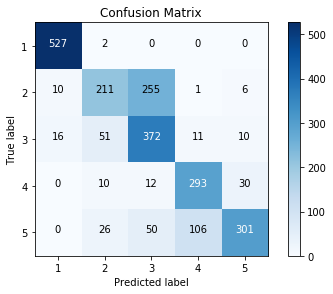

In [8]:
util.visualize_confusion_matrix(r_cm, classes)

## Fourier Transform

In [9]:
X_f_train = np.fft.rfft(X_train, axis=1).astype(float)
X_f_test = np.fft.rfft(X_test, axis=1).astype(float)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: ComplexWarning: Casting complex values to real discards the imaginary part
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: ComplexWarning: Casting complex values to real discards the imaginary part
  


In [11]:
f_cv_results, f_acc, f_f1_macro, f_f1_per_class, f_cm = util.evaluate_cnn(X_f_train, y_train, ids_train, X_f_test, y_test, classes, scoring)

Epoch 1/25
8280/8280 [==============================] - 22s 3ms/step - loss: 0.9388 - acc: 0.5810
Epoch 2/25
8280/8280 [==============================] - 18s 2ms/step - loss: 0.7889 - acc: 0.6438
Epoch 3/25
8280/8280 [==============================] - 15s 2ms/step - loss: 0.7603 - acc: 0.6604
Epoch 4/25
8280/8280 [==============================] - 16s 2ms/step - loss: 0.7230 - acc: 0.6755
Epoch 5/25
8280/8280 [==============================] - 15s 2ms/step - loss: 0.6865 - acc: 0.6896
Epoch 6/25
8280/8280 [==============================] - 15s 2ms/step - loss: 0.6531 - acc: 0.7040
Epoch 7/25
8280/8280 [==============================] - 14s 2ms/step - loss: 0.6188 - acc: 0.7176
Epoch 8/25
8280/8280 [==============================] - 15s 2ms/step - loss: 0.6040 - acc: 0.7284
Epoch 9/25
8280/8280 [==============================] - 13s 2ms/step - loss: 0.5664 - acc: 0.7402
Epoch 10/25
8280/8280 [==============================] - 14s 2ms/step - loss: 0.5495 - acc: 0.7506
Epoch 11/25
8280/82

8280/8280 [==============================] - 13s 2ms/step - loss: 0.6155 - acc: 0.7215
Epoch 10/25
8280/8280 [==============================] - 13s 2ms/step - loss: 0.5880 - acc: 0.7447
Epoch 11/25
8280/8280 [==============================] - 13s 2ms/step - loss: 0.5627 - acc: 0.7470
Epoch 12/25
8280/8280 [==============================] - 13s 2ms/step - loss: 0.5485 - acc: 0.7569
Epoch 13/25
8280/8280 [==============================] - 13s 2ms/step - loss: 0.5170 - acc: 0.7703
Epoch 14/25
8280/8280 [==============================] - 13s 2ms/step - loss: 0.4977 - acc: 0.7767
Epoch 15/25
8280/8280 [==============================] - 13s 2ms/step - loss: 0.4838 - acc: 0.7877
Epoch 16/25
8280/8280 [==============================] - 13s 2ms/step - loss: 0.4526 - acc: 0.8042
Epoch 17/25
8280/8280 [==============================] - 13s 2ms/step - loss: 0.4322 - acc: 0.8141
Epoch 18/25
8280/8280 [==============================] - 13s 2ms/step - loss: 0.4050 - acc: 0.8225
Epoch 19/25
8280/8280 

8280/8280 [==============================] - 13s 2ms/step - loss: 0.4124 - acc: 0.8156
Epoch 18/25
8280/8280 [==============================] - 13s 2ms/step - loss: 0.3865 - acc: 0.8302
Epoch 19/25
8280/8280 [==============================] - 13s 2ms/step - loss: 0.3869 - acc: 0.8337
Epoch 20/25
8280/8280 [==============================] - 13s 2ms/step - loss: 0.3581 - acc: 0.8481
Epoch 21/25
8280/8280 [==============================] - 13s 2ms/step - loss: 0.3156 - acc: 0.8639
Epoch 22/25
8280/8280 [==============================] - 13s 2ms/step - loss: 0.3232 - acc: 0.8640
Epoch 23/25
8280/8280 [==============================] - 13s 2ms/step - loss: 0.3013 - acc: 0.8743
Epoch 24/25
8280/8280 [==============================] - 13s 2ms/step - loss: 0.2878 - acc: 0.8836
Epoch 25/25
8280/8280 [==============================] - 13s 2ms/step - loss: 0.2748 - acc: 0.8903
Epoch 1/25
8280/8280 [==============================] - 19s 2ms/step - loss: 0.9471 - acc: 0.5768
Epoch 2/25
8280/8280 [=

8280/8280 [==============================] - 13s 2ms/step - loss: 0.2187 - acc: 0.9144
Epoch 1/25
8280/8280 [==============================] - 21s 2ms/step - loss: 0.9278 - acc: 0.5873
Epoch 2/25
8280/8280 [==============================] - 14s 2ms/step - loss: 0.7476 - acc: 0.6585
Epoch 3/25
8280/8280 [==============================] - 14s 2ms/step - loss: 0.6771 - acc: 0.6845
Epoch 4/25
8280/8280 [==============================] - 14s 2ms/step - loss: 0.6102 - acc: 0.7135
Epoch 5/25
8280/8280 [==============================] - 14s 2ms/step - loss: 0.5760 - acc: 0.7320
Epoch 6/25
8280/8280 [==============================] - 14s 2ms/step - loss: 0.5587 - acc: 0.7368
Epoch 7/25
8280/8280 [==============================] - 14s 2ms/step - loss: 0.5315 - acc: 0.7507
Epoch 8/25
8280/8280 [==============================] - 14s 2ms/step - loss: 0.5095 - acc: 0.7636
Epoch 9/25
8280/8280 [==============================] - 14s 2ms/step - loss: 0.4767 - acc: 0.7761
Epoch 10/25
8280/8280 [========

8280/8280 [==============================] - 15s 2ms/step - loss: 0.5690 - acc: 0.7296
Epoch 7/25
8280/8280 [==============================] - 15s 2ms/step - loss: 0.5343 - acc: 0.7488
Epoch 8/25
8280/8280 [==============================] - 15s 2ms/step - loss: 0.5173 - acc: 0.7622
Epoch 9/25
8280/8280 [==============================] - 15s 2ms/step - loss: 0.4849 - acc: 0.7771
Epoch 10/25
8280/8280 [==============================] - 15s 2ms/step - loss: 0.4577 - acc: 0.7895
Epoch 11/25
8280/8280 [==============================] - 15s 2ms/step - loss: 0.4407 - acc: 0.7999
Epoch 12/25
8280/8280 [==============================] - 15s 2ms/step - loss: 0.4019 - acc: 0.8187
Epoch 13/25
8280/8280 [==============================] - 15s 2ms/step - loss: 0.3812 - acc: 0.8295
Epoch 14/25
8280/8280 [==============================] - 15s 2ms/step - loss: 0.3602 - acc: 0.8448
Epoch 15/25
8280/8280 [==============================] - 15s 2ms/step - loss: 0.3206 - acc: 0.8615
Epoch 16/25
8280/8280 [==

8280/8280 [==============================] - 15s 2ms/step - loss: 0.3432 - acc: 0.8428
Epoch 15/25
8280/8280 [==============================] - 15s 2ms/step - loss: 0.3323 - acc: 0.8500
Epoch 16/25
8280/8280 [==============================] - 15s 2ms/step - loss: 0.2987 - acc: 0.8684
Epoch 17/25
8280/8280 [==============================] - 15s 2ms/step - loss: 0.2855 - acc: 0.8731
Epoch 18/25
8280/8280 [==============================] - 15s 2ms/step - loss: 0.2532 - acc: 0.8931
Epoch 19/25
8280/8280 [==============================] - 15s 2ms/step - loss: 0.2277 - acc: 0.9050
Epoch 20/25
8280/8280 [==============================] - 15s 2ms/step - loss: 0.2227 - acc: 0.9045
Epoch 21/25
8280/8280 [==============================] - 15s 2ms/step - loss: 0.2592 - acc: 0.9046
Epoch 22/25
8280/8280 [==============================] - 15s 2ms/step - loss: 0.1840 - acc: 0.9260
Epoch 23/25
8280/8280 [==============================] - 15s 2ms/step - loss: 0.1772 - acc: 0.9330
Epoch 24/25
8280/8280 

8280/8280 [==============================] - 15s 2ms/step - loss: 0.2432 - acc: 0.8973
Epoch 23/25
8280/8280 [==============================] - 15s 2ms/step - loss: 0.1925 - acc: 0.9155
Epoch 24/25
8280/8280 [==============================] - 15s 2ms/step - loss: 0.2081 - acc: 0.9173
Epoch 25/25
8280/8280 [==============================] - 15s 2ms/step - loss: 0.1950 - acc: 0.9255
Epoch 1/25
8280/8280 [==============================] - 23s 3ms/step - loss: 0.9120 - acc: 0.5903
Epoch 2/25
8280/8280 [==============================] - 17s 2ms/step - loss: 0.6833 - acc: 0.6849
Epoch 3/25
8280/8280 [==============================] - 18s 2ms/step - loss: 0.6088 - acc: 0.7117
Epoch 4/25
8280/8280 [==============================] - 16s 2ms/step - loss: 0.5731 - acc: 0.7266
Epoch 5/25
8280/8280 [==============================] - 16s 2ms/step - loss: 0.5363 - acc: 0.7478
Epoch 6/25
8280/8280 [==============================] - 16s 2ms/step - loss: 0.5222 - acc: 0.7545
Epoch 7/25
8280/8280 [======

8280/8280 [==============================] - 17s 2ms/step - loss: 0.5655 - acc: 0.7371
Epoch 6/25
8280/8280 [==============================] - 17s 2ms/step - loss: 0.5462 - acc: 0.7406
Epoch 7/25
8280/8280 [==============================] - 17s 2ms/step - loss: 0.5056 - acc: 0.7664
Epoch 8/25
8280/8280 [==============================] - 17s 2ms/step - loss: 0.4929 - acc: 0.7696
Epoch 9/25
8280/8280 [==============================] - 17s 2ms/step - loss: 0.4653 - acc: 0.7821
Epoch 10/25
8280/8280 [==============================] - 17s 2ms/step - loss: 0.4277 - acc: 0.8016: 0s - loss: 0.4280 - ac
Epoch 11/25
8280/8280 [==============================] - 17s 2ms/step - loss: 0.3884 - acc: 0.8249
Epoch 12/25
8280/8280 [==============================] - 17s 2ms/step - loss: 0.3753 - acc: 0.8289
Epoch 13/25
8280/8280 [==============================] - 17s 2ms/step - loss: 0.3590 - acc: 0.8430
Epoch 14/25
8280/8280 [==============================] - 17s 2ms/step - loss: 0.3117 - acc: 0.8612
Ep

8280/8280 [==============================] - 19s 2ms/step - loss: 0.3821 - acc: 0.8246
Epoch 13/25
8280/8280 [==============================] - 19s 2ms/step - loss: 0.3467 - acc: 0.8454
Epoch 14/25
8280/8280 [==============================] - 19s 2ms/step - loss: 0.3351 - acc: 0.8508
Epoch 15/25
8280/8280 [==============================] - 19s 2ms/step - loss: 0.2992 - acc: 0.8649
Epoch 16/25
8280/8280 [==============================] - 19s 2ms/step - loss: 0.2905 - acc: 0.8700
Epoch 17/25
8280/8280 [==============================] - 19s 2ms/step - loss: 0.2478 - acc: 0.8891
Epoch 18/25
8280/8280 [==============================] - 19s 2ms/step - loss: 0.2408 - acc: 0.8971
Epoch 19/25
8280/8280 [==============================] - 19s 2ms/step - loss: 0.2269 - acc: 0.9052
Epoch 20/25
8280/8280 [==============================] - 19s 2ms/step - loss: 0.1936 - acc: 0.9141
Epoch 21/25
8280/8280 [==============================] - 19s 2ms/step - loss: 0.2028 - acc: 0.9159
Epoch 22/25
8280/8280 

8280/8280 [==============================] - 21s 3ms/step - loss: 0.2012 - acc: 0.9159
Epoch 21/25
8280/8280 [==============================] - 22s 3ms/step - loss: 0.1922 - acc: 0.9233: 1s - l
Epoch 22/25
8280/8280 [==============================] - 20s 2ms/step - loss: 0.1682 - acc: 0.9345
Epoch 23/25
8280/8280 [==============================] - 22s 3ms/step - loss: 0.1760 - acc: 0.9355
Epoch 24/25
8280/8280 [==============================] - 21s 2ms/step - loss: 0.1389 - acc: 0.9447
Epoch 25/25
8280/8280 [==============================] - 20s 2ms/step - loss: 0.1488 - acc: 0.9457
Epoch 1/25
8280/8280 [==============================] - 29s 3ms/step - loss: 0.9606 - acc: 0.5744
Epoch 2/25
8280/8280 [==============================] - 19s 2ms/step - loss: 0.8120 - acc: 0.6373
Epoch 3/25
8280/8280 [==============================] - 19s 2ms/step - loss: 0.7742 - acc: 0.6559
Epoch 4/25
8280/8280 [==============================] - 18s 2ms/step - loss: 0.7348 - acc: 0.6667
Epoch 5/25
8280/82

8280/8280 [==============================] - 16s 2ms/step - loss: 0.7967 - acc: 0.6434
Epoch 4/25
8280/8280 [==============================] - 17s 2ms/step - loss: 0.7647 - acc: 0.6517
Epoch 5/25
8280/8280 [==============================] - 16s 2ms/step - loss: 0.7428 - acc: 0.6635
Epoch 6/25
8280/8280 [==============================] - 16s 2ms/step - loss: 0.7096 - acc: 0.6832
Epoch 7/25
8280/8280 [==============================] - 18s 2ms/step - loss: 0.6929 - acc: 0.6868
Epoch 8/25
8280/8280 [==============================] - 17s 2ms/step - loss: 0.6606 - acc: 0.7046
Epoch 9/25
8280/8280 [==============================] - 20s 2ms/step - loss: 0.6342 - acc: 0.7146
Epoch 10/25
8280/8280 [==============================] - 24s 3ms/step - loss: 0.6168 - acc: 0.7203
Epoch 11/25
8280/8280 [==============================] - 17s 2ms/step - loss: 0.5947 - acc: 0.7319
Epoch 12/25
8280/8280 [==============================] - 17s 2ms/step - loss: 0.5667 - acc: 0.7488
Epoch 13/25
8280/8280 [=====

8280/8280 [==============================] - 17s 2ms/step - loss: 0.6084 - acc: 0.7228
Epoch 11/25
8280/8280 [==============================] - 18s 2ms/step - loss: 0.5788 - acc: 0.7344
Epoch 12/25
8280/8280 [==============================] - 19s 2ms/step - loss: 0.5596 - acc: 0.7483
Epoch 13/25
8280/8280 [==============================] - 21s 3ms/step - loss: 0.5427 - acc: 0.7586
Epoch 14/25
8280/8280 [==============================] - 19s 2ms/step - loss: 0.5220 - acc: 0.7687
Epoch 15/25
8280/8280 [==============================] - 19s 2ms/step - loss: 0.5106 - acc: 0.7746
Epoch 16/25
8280/8280 [==============================] - 18s 2ms/step - loss: 0.4861 - acc: 0.7861
Epoch 17/25
8280/8280 [==============================] - 18s 2ms/step - loss: 0.4579 - acc: 0.7976
Epoch 18/25
8280/8280 [==============================] - 19s 2ms/step - loss: 0.4401 - acc: 0.8077
Epoch 19/25
8280/8280 [==============================] - 21s 3ms/step - loss: 0.4353 - acc: 0.8111
Epoch 20/25
8280/8280 

8280/8280 [==============================] - 18s 2ms/step - loss: 0.3926 - acc: 0.8360
Epoch 19/25
8280/8280 [==============================] - 17s 2ms/step - loss: 0.3868 - acc: 0.8297
Epoch 20/25
8280/8280 [==============================] - 19s 2ms/step - loss: 0.3647 - acc: 0.8488
Epoch 21/25
8280/8280 [==============================] - 17s 2ms/step - loss: 0.3183 - acc: 0.8645
Epoch 22/25
8280/8280 [==============================] - 16s 2ms/step - loss: 0.3297 - acc: 0.8656
Epoch 23/25
8280/8280 [==============================] - 17s 2ms/step - loss: 0.2764 - acc: 0.8850
Epoch 24/25
8280/8280 [==============================] - 17s 2ms/step - loss: 0.2934 - acc: 0.8779
Epoch 25/25
8280/8280 [==============================] - 17s 2ms/step - loss: 0.2542 - acc: 0.8963
Epoch 1/25
8280/8280 [==============================] - 39s 5ms/step - loss: 0.9356 - acc: 0.5761
Epoch 2/25
8280/8280 [==============================] - 23s 3ms/step - loss: 0.7534 - acc: 0.6601
Epoch 3/25
8280/8280 [==

8280/8280 [==============================] - 23s 3ms/step - loss: 0.1959 - acc: 0.9216
Epoch 1/25
8280/8280 [==============================] - 30s 4ms/step - loss: 0.9658 - acc: 0.5726
Epoch 2/25
8280/8280 [==============================] - 24s 3ms/step - loss: 0.7842 - acc: 0.6500
Epoch 3/25
8280/8280 [==============================] - 21s 3ms/step - loss: 0.7065 - acc: 0.6803
Epoch 4/25
8280/8280 [==============================] - 18s 2ms/step - loss: 0.6562 - acc: 0.6928
Epoch 5/25
8280/8280 [==============================] - 20s 2ms/step - loss: 0.6127 - acc: 0.7087
Epoch 6/25
8280/8280 [==============================] - 23s 3ms/step - loss: 0.5932 - acc: 0.7250
Epoch 7/25
8280/8280 [==============================] - 21s 3ms/step - loss: 0.5661 - acc: 0.7356
Epoch 8/25
8280/8280 [==============================] - 19s 2ms/step - loss: 0.5451 - acc: 0.7473
Epoch 9/25
8280/8280 [==============================] - 19s 2ms/step - loss: 0.5128 - acc: 0.7645
Epoch 10/25
8280/8280 [========

8280/8280 [==============================] - 17s 2ms/step - loss: 0.5431 - acc: 0.7440: 1s
Epoch 9/25
8280/8280 [==============================] - 17s 2ms/step - loss: 0.5240 - acc: 0.7536
Epoch 10/25
8280/8280 [==============================] - 17s 2ms/step - loss: 0.5143 - acc: 0.7554
Epoch 11/25
8280/8280 [==============================] - 17s 2ms/step - loss: 0.4983 - acc: 0.7675
Epoch 12/25
8280/8280 [==============================] - 17s 2ms/step - loss: 0.4723 - acc: 0.7760
Epoch 13/25
8280/8280 [==============================] - 17s 2ms/step - loss: 0.4668 - acc: 0.7802
Epoch 14/25
8280/8280 [==============================] - 17s 2ms/step - loss: 0.4251 - acc: 0.7954
Epoch 15/25
8280/8280 [==============================] - 17s 2ms/step - loss: 0.4219 - acc: 0.8008
Epoch 16/25
8280/8280 [==============================] - 17s 2ms/step - loss: 0.4049 - acc: 0.8098
Epoch 17/25
8280/8280 [==============================] - 17s 2ms/step - loss: 0.3774 - acc: 0.8260
Epoch 18/25
8280/82

Epoch 15/25
8280/8280 [==============================] - 18s 2ms/step - loss: 0.3686 - acc: 0.8326
Epoch 16/25
8280/8280 [==============================] - 17s 2ms/step - loss: 0.3493 - acc: 0.8430
Epoch 17/25
8280/8280 [==============================] - 18s 2ms/step - loss: 0.3556 - acc: 0.8417
Epoch 18/25
8280/8280 [==============================] - 17s 2ms/step - loss: 0.3047 - acc: 0.8646
Epoch 19/25
8280/8280 [==============================] - 18s 2ms/step - loss: 0.3027 - acc: 0.8645
Epoch 20/25
8280/8280 [==============================] - 17s 2ms/step - loss: 0.2725 - acc: 0.8820
Epoch 21/25
8280/8280 [==============================] - 18s 2ms/step - loss: 0.2663 - acc: 0.8871
Epoch 22/25
8280/8280 [==============================] - 19s 2ms/step - loss: 0.2312 - acc: 0.9029
Epoch 23/25
8280/8280 [==============================] - 20s 2ms/step - loss: 0.2412 - acc: 0.9011
Epoch 24/25
8280/8280 [==============================] - 18s 2ms/step - loss: 0.2221 - acc: 0.9098
Epoch 25/2

8280/8280 [==============================] - 21s 3ms/step - loss: 0.2341 - acc: 0.9080
Epoch 23/25
8280/8280 [==============================] - 21s 3ms/step - loss: 0.1883 - acc: 0.9242
Epoch 24/25
8280/8280 [==============================] - 21s 3ms/step - loss: 0.1717 - acc: 0.9292
Epoch 25/25
8280/8280 [==============================] - 21s 3ms/step - loss: 0.2118 - acc: 0.9252
Epoch 1/25
8280/8280 [==============================] - 32s 4ms/step - loss: 0.9416 - acc: 0.5774
Epoch 2/25
8280/8280 [==============================] - 22s 3ms/step - loss: 0.6976 - acc: 0.6826
Epoch 3/25
8280/8280 [==============================] - 22s 3ms/step - loss: 0.6418 - acc: 0.7018
Epoch 4/25
8280/8280 [==============================] - 22s 3ms/step - loss: 0.5997 - acc: 0.7182
Epoch 5/25
8280/8280 [==============================] - 22s 3ms/step - loss: 0.5659 - acc: 0.7365
Epoch 6/25
8280/8280 [==============================] - 22s 3ms/step - loss: 0.5482 - acc: 0.7414
Epoch 7/25
8280/8280 [======

8280/8280 [==============================] - 20s 2ms/step - loss: 0.5793 - acc: 0.7320
Epoch 5/25
8280/8280 [==============================] - 20s 2ms/step - loss: 0.5588 - acc: 0.7393
Epoch 6/25
8280/8280 [==============================] - 21s 2ms/step - loss: 0.5264 - acc: 0.7522
Epoch 7/25
8280/8280 [==============================] - 20s 2ms/step - loss: 0.5052 - acc: 0.7676
Epoch 8/25
8280/8280 [==============================] - 22s 3ms/step - loss: 0.4911 - acc: 0.7702
Epoch 9/25
8280/8280 [==============================] - 22s 3ms/step - loss: 0.4734 - acc: 0.7740
Epoch 10/25
8280/8280 [==============================] - 20s 2ms/step - loss: 0.4332 - acc: 0.7959
Epoch 11/25
8280/8280 [==============================] - 21s 2ms/step - loss: 0.4204 - acc: 0.8109
Epoch 12/25
8280/8280 [==============================] - 22s 3ms/step - loss: 0.3830 - acc: 0.8210
Epoch 13/25
8280/8280 [==============================] - 20s 2ms/step - loss: 0.3703 - acc: 0.8304
Epoch 14/25
8280/8280 [====

8280/8280 [==============================] - 22s 3ms/step - loss: 0.4047 - acc: 0.8161
Epoch 13/25
8280/8280 [==============================] - 22s 3ms/step - loss: 0.3578 - acc: 0.8386
Epoch 14/25
8280/8280 [==============================] - 22s 3ms/step - loss: 0.3528 - acc: 0.8446
Epoch 15/25
8280/8280 [==============================] - 23s 3ms/step - loss: 0.3040 - acc: 0.8636
Epoch 16/25
8280/8280 [==============================] - 23s 3ms/step - loss: 0.3098 - acc: 0.8595
Epoch 17/25
8280/8280 [==============================] - 24s 3ms/step - loss: 0.2689 - acc: 0.8827
Epoch 18/25
8280/8280 [==============================] - 22s 3ms/step - loss: 0.2714 - acc: 0.8845
Epoch 19/25
8280/8280 [==============================] - 22s 3ms/step - loss: 0.2433 - acc: 0.8947
Epoch 20/25
8280/8280 [==============================] - 23s 3ms/step - loss: 0.2170 - acc: 0.9066
Epoch 21/25
8280/8280 [==============================] - 25s 3ms/step - loss: 0.1937 - acc: 0.9171
Epoch 22/25
8280/8280 

8280/8280 [==============================] - 20s 2ms/step - loss: 0.5105 - acc: 0.7767
Epoch 21/25
8280/8280 [==============================] - 20s 2ms/step - loss: 0.5010 - acc: 0.7843
Epoch 22/25
8280/8280 [==============================] - 20s 2ms/step - loss: 0.4756 - acc: 0.7944
Epoch 23/25
8280/8280 [==============================] - 19s 2ms/step - loss: 0.4591 - acc: 0.8011
Epoch 24/25
8280/8280 [==============================] - 20s 2ms/step - loss: 0.4475 - acc: 0.8011
Epoch 25/25
8280/8280 [==============================] - 21s 3ms/step - loss: 0.4434 - acc: 0.8088
Epoch 1/25
8280/8280 [==============================] - 30s 4ms/step - loss: 1.0451 - acc: 0.5283
Epoch 2/25
8280/8280 [==============================] - 21s 2ms/step - loss: 0.8736 - acc: 0.6138
Epoch 3/25
8280/8280 [==============================] - 20s 2ms/step - loss: 0.8355 - acc: 0.6293
Epoch 4/25
8280/8280 [==============================] - 21s 3ms/step - loss: 0.8095 - acc: 0.6324
Epoch 5/25
8280/8280 [====

8280/8280 [==============================] - 20s 2ms/step - loss: 0.8279 - acc: 0.6315
Epoch 4/25
8280/8280 [==============================] - 20s 2ms/step - loss: 0.7928 - acc: 0.6397
Epoch 5/25
8280/8280 [==============================] - 20s 2ms/step - loss: 0.7763 - acc: 0.6570
Epoch 6/25
8280/8280 [==============================] - 20s 2ms/step - loss: 0.7631 - acc: 0.6643
Epoch 7/25
8280/8280 [==============================] - 20s 2ms/step - loss: 0.7313 - acc: 0.6704
Epoch 8/25
8280/8280 [==============================] - 20s 2ms/step - loss: 0.7052 - acc: 0.6835
Epoch 9/25
8280/8280 [==============================] - 20s 2ms/step - loss: 0.6931 - acc: 0.6891
Epoch 10/25
8280/8280 [==============================] - 20s 2ms/step - loss: 0.6693 - acc: 0.7007
Epoch 11/25
8280/8280 [==============================] - 20s 2ms/step - loss: 0.6398 - acc: 0.7043
Epoch 12/25
8280/8280 [==============================] - 20s 2ms/step - loss: 0.6382 - acc: 0.7115
Epoch 13/25
8280/8280 [=====

8280/8280 [==============================] - 20s 2ms/step - loss: 0.6566 - acc: 0.7106
Epoch 12/25
8280/8280 [==============================] - 21s 3ms/step - loss: 0.6400 - acc: 0.7161
Epoch 13/25
8280/8280 [==============================] - 22s 3ms/step - loss: 0.6226 - acc: 0.7233
Epoch 14/25
8280/8280 [==============================] - 21s 3ms/step - loss: 0.5948 - acc: 0.7391
Epoch 15/25
8280/8280 [==============================] - 20s 2ms/step - loss: 0.5850 - acc: 0.7438
Epoch 16/25
8280/8280 [==============================] - 20s 2ms/step - loss: 0.5559 - acc: 0.7537
Epoch 17/25
8280/8280 [==============================] - 21s 3ms/step - loss: 0.5414 - acc: 0.7667
Epoch 18/25
8280/8280 [==============================] - 20s 2ms/step - loss: 0.5066 - acc: 0.7726
Epoch 19/25
8280/8280 [==============================] - 20s 2ms/step - loss: 0.5062 - acc: 0.7796
Epoch 20/25
8280/8280 [==============================] - 20s 2ms/step - loss: 0.4762 - acc: 0.7952
Epoch 21/25
8280/8280 

8280/8280 [==============================] - 39s 5ms/step - loss: 0.3830 - acc: 0.8309
Epoch 20/25
8280/8280 [==============================] - 39s 5ms/step - loss: 0.3820 - acc: 0.8280
Epoch 21/25
8280/8280 [==============================] - 39s 5ms/step - loss: 0.3752 - acc: 0.8406
Epoch 22/25
8280/8280 [==============================] - 39s 5ms/step - loss: 0.3594 - acc: 0.8444
Epoch 23/25
8280/8280 [==============================] - 39s 5ms/step - loss: 0.3470 - acc: 0.8542
Epoch 24/25
8280/8280 [==============================] - 39s 5ms/step - loss: 0.3308 - acc: 0.8558
Epoch 25/25
8280/8280 [==============================] - 38s 5ms/step - loss: 0.3383 - acc: 0.8579
Epoch 1/25
8280/8280 [==============================] - 52s 6ms/step - loss: 1.0566 - acc: 0.5320
Epoch 2/25
8280/8280 [==============================] - 38s 5ms/step - loss: 0.8611 - acc: 0.6180
Epoch 3/25
8280/8280 [==============================] - 38s 5ms/step - loss: 0.7945 - acc: 0.6443
Epoch 4/25
8280/8280 [===

8280/8280 [==============================] - 33s 4ms/step - loss: 1.0483 - acc: 0.5379
Epoch 2/25
8280/8280 [==============================] - 22s 3ms/step - loss: 0.8420 - acc: 0.6302
Epoch 3/25
8280/8280 [==============================] - 22s 3ms/step - loss: 0.7764 - acc: 0.6476
Epoch 4/25
8280/8280 [==============================] - 22s 3ms/step - loss: 0.7286 - acc: 0.6634
Epoch 5/25
8280/8280 [==============================] - 23s 3ms/step - loss: 0.6876 - acc: 0.6895
Epoch 6/25
8280/8280 [==============================] - 22s 3ms/step - loss: 0.6537 - acc: 0.7023
Epoch 7/25
8280/8280 [==============================] - 22s 3ms/step - loss: 0.6261 - acc: 0.7106
Epoch 8/25
8280/8280 [==============================] - 22s 3ms/step - loss: 0.6000 - acc: 0.7203
Epoch 9/25
8280/8280 [==============================] - 22s 3ms/step - loss: 0.5784 - acc: 0.7301
Epoch 10/25
8280/8280 [==============================] - 22s 3ms/step - loss: 0.5730 - acc: 0.7341
Epoch 11/25
8280/8280 [=======

8280/8280 [==============================] - 21s 3ms/step - loss: 0.6032 - acc: 0.7203
Epoch 9/25
8280/8280 [==============================] - 20s 2ms/step - loss: 0.6134 - acc: 0.7190
Epoch 10/25
8280/8280 [==============================] - 20s 2ms/step - loss: 0.5581 - acc: 0.7414
Epoch 11/25
8280/8280 [==============================] - 20s 2ms/step - loss: 0.5473 - acc: 0.7459
Epoch 12/25
8280/8280 [==============================] - 20s 2ms/step - loss: 0.5183 - acc: 0.7568
Epoch 13/25
8280/8280 [==============================] - 20s 2ms/step - loss: 0.5025 - acc: 0.7659
Epoch 14/25
8280/8280 [==============================] - 20s 2ms/step - loss: 0.4957 - acc: 0.7685
Epoch 15/25
8280/8280 [==============================] - 20s 2ms/step - loss: 0.4706 - acc: 0.7843
Epoch 16/25
8280/8280 [==============================] - 20s 2ms/step - loss: 0.4643 - acc: 0.7877
Epoch 17/25
8280/8280 [==============================] - 20s 2ms/step - loss: 0.4271 - acc: 0.8001
Epoch 18/25
8280/8280 [

8280/8280 [==============================] - 22s 3ms/step - loss: 0.4447 - acc: 0.7890
Epoch 16/25
8280/8280 [==============================] - 22s 3ms/step - loss: 0.4319 - acc: 0.8037
Epoch 17/25
8280/8280 [==============================] - 22s 3ms/step - loss: 0.3982 - acc: 0.8085
Epoch 18/25
8280/8280 [==============================] - 22s 3ms/step - loss: 0.3864 - acc: 0.8223
Epoch 19/25
8280/8280 [==============================] - 22s 3ms/step - loss: 0.3789 - acc: 0.8273
Epoch 20/25
8280/8280 [==============================] - 22s 3ms/step - loss: 0.3624 - acc: 0.8329
Epoch 21/25
8280/8280 [==============================] - 22s 3ms/step - loss: 0.3473 - acc: 0.8437
Epoch 22/25
8280/8280 [==============================] - 22s 3ms/step - loss: 0.3467 - acc: 0.8407
Epoch 23/25
8280/8280 [==============================] - 22s 3ms/step - loss: 0.3278 - acc: 0.8554
Epoch 24/25
8280/8280 [==============================] - 22s 3ms/step - loss: 0.3175 - acc: 0.8626
Epoch 25/25
8280/8280 

8280/8280 [==============================] - 22s 3ms/step - loss: 0.2969 - acc: 0.8737
Epoch 24/25
8280/8280 [==============================] - 22s 3ms/step - loss: 0.2881 - acc: 0.8732
Epoch 25/25
8280/8280 [==============================] - 22s 3ms/step - loss: 0.2629 - acc: 0.8877
Epoch 1/25
8280/8280 [==============================] - 33s 4ms/step - loss: 1.0163 - acc: 0.5420
Epoch 2/25
8280/8280 [==============================] - 22s 3ms/step - loss: 0.7756 - acc: 0.6580
Epoch 3/25
8280/8280 [==============================] - 22s 3ms/step - loss: 0.6849 - acc: 0.6835
Epoch 4/25
8280/8280 [==============================] - 22s 3ms/step - loss: 0.6373 - acc: 0.7056
Epoch 5/25
8280/8280 [==============================] - 22s 3ms/step - loss: 0.6120 - acc: 0.7164
Epoch 6/25
8280/8280 [==============================] - 22s 3ms/step - loss: 0.5942 - acc: 0.7300
Epoch 7/25
8280/8280 [==============================] - 22s 3ms/step - loss: 0.5574 - acc: 0.7373
Epoch 8/25
8280/8280 [=======

8280/8280 [==============================] - 23s 3ms/step - loss: 0.5906 - acc: 0.7252
Epoch 7/25
8280/8280 [==============================] - 23s 3ms/step - loss: 0.5733 - acc: 0.7342
Epoch 8/25
8280/8280 [==============================] - 23s 3ms/step - loss: 0.5459 - acc: 0.7489
Epoch 9/25
8280/8280 [==============================] - 23s 3ms/step - loss: 0.5114 - acc: 0.7594
Epoch 10/25
8280/8280 [==============================] - 23s 3ms/step - loss: 0.4969 - acc: 0.7727
Epoch 11/25
8280/8280 [==============================] - 23s 3ms/step - loss: 0.4713 - acc: 0.7837
Epoch 12/25
8280/8280 [==============================] - 23s 3ms/step - loss: 0.4567 - acc: 0.7844
Epoch 13/25
8280/8280 [==============================] - 23s 3ms/step - loss: 0.4383 - acc: 0.7990
Epoch 14/25
8280/8280 [==============================] - 23s 3ms/step - loss: 0.4027 - acc: 0.8110
Epoch 15/25
8280/8280 [==============================] - 23s 3ms/step - loss: 0.3909 - acc: 0.8193
Epoch 16/25
8280/8280 [==

In [16]:
f_cv_df = pd.DataFrame.from_dict(f_cv_results)
f_cv_df.to_csv('fourier_cnn_cv_results.csv')
f_cv_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_batch_size,param_dropout,param_epochs,param_window,params,split0_test_accuracy,...,split2_train_f1_class_5,split3_train_f1_class_5,split4_train_f1_class_5,split5_train_f1_class_5,split6_train_f1_class_5,split7_train_f1_class_5,split8_train_f1_class_5,split9_train_f1_class_5,mean_train_f1_class_5,std_train_f1_class_5
0,340.901578,9.306314,8.027716,0.309188,5,0.1,25,3,"{'batch_size': 5, 'dropout': 0.1, 'epochs': 25...",0.721739,...,0.945708,0.942556,0.941931,0.927685,0.910109,0.912929,0.953504,0.947923,0.939406,0.016045
1,374.546287,6.061480,9.138260,0.456814,5,0.1,25,5,"{'batch_size': 5, 'dropout': 0.1, 'epochs': 25...",0.688043,...,0.949489,0.962182,0.966456,0.964380,0.967081,0.973158,0.940890,0.969016,0.964620,0.010939
2,456.396541,40.730289,10.641900,1.269472,5,0.1,25,7,"{'batch_size': 5, 'dropout': 0.1, 'epochs': 25...",0.703261,...,0.984357,0.986536,0.987247,0.979290,0.983856,0.926566,0.979347,0.977223,0.977820,0.017502
3,462.358715,16.987634,11.979898,1.606661,5,0.2,25,3,"{'batch_size': 5, 'dropout': 0.2, 'epochs': 25...",0.682609,...,0.869793,0.921528,0.950030,0.931307,0.912291,0.930399,0.947334,0.954229,0.926871,0.023711
4,496.826175,50.249015,13.137796,1.541353,5,0.2,25,5,"{'batch_size': 5, 'dropout': 0.2, 'epochs': 25...",0.700000,...,0.984919,0.966916,0.979770,0.977131,0.965215,0.980870,0.979712,0.978880,0.975159,0.008685
5,547.153505,27.800451,13.898470,1.785452,5,0.2,25,7,"{'batch_size': 5, 'dropout': 0.2, 'epochs': 25...",0.704348,...,0.983159,0.988142,0.985907,0.974484,0.983223,0.983305,0.925711,0.970597,0.973175,0.017650
6,515.349092,14.677991,13.743468,1.242602,5,0.5,25,3,"{'batch_size': 5, 'dropout': 0.5, 'epochs': 25...",0.707609,...,0.902336,0.875821,0.908715,0.894458,0.889441,0.902730,0.890363,0.919374,0.895162,0.012794
7,618.211914,87.565521,15.483522,1.397065,5,0.5,25,5,"{'batch_size': 5, 'dropout': 0.5, 'epochs': 25...",0.688043,...,0.960538,0.951161,0.962643,0.928060,0.953339,0.948725,0.950437,0.950311,0.943577,0.024683
8,564.473972,7.683459,14.680183,0.466195,5,0.5,25,7,"{'batch_size': 5, 'dropout': 0.5, 'epochs': 25...",0.689130,...,0.964037,0.968607,0.977406,0.959859,0.965770,0.965264,0.951575,0.969605,0.967430,0.007713


In [13]:
print('Accuracy: ', f_acc)
print('Macro F1: ', f_f1_macro)
print('F1 per class: ', f_f1_per_class)

Accuracy:  0.7191304347826087
Macro F1:  0.7121213153188182
F1 per class:  [0.9462771  0.50813517 0.60797034 0.76241611 0.73580786]


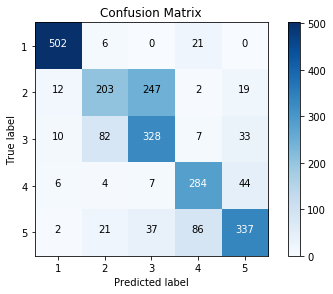

In [14]:
util.visualize_confusion_matrix(f_cm, classes)